In [1]:
!ls

 diabetes_csv.csv    lab_3.ipynb
 hepatitis_csv.csv  'Week-03-Data-Preprocessing and Regression Techniques.pdf'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

---------------------------------
### Question 1 and Additional Question 1
---------------------------------

In [45]:
df = pd.read_csv('hepatitis_csv.csv')
df.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [40]:
length = df.shape[0]
threshold = .15

for i in df.columns:
    if df[i].isna().sum() >= length * threshold:
        df.drop(columns=[i], inplace=True)
        
print(df.columns)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')


In [42]:
df.shape

(155, 20)

In [46]:
length = df.shape[0]
threshold = .15

df.dropna(axis=1, thresh=length * (1 - threshold), inplace=True)
df.shape

(155, 18)

In [47]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(129, 18)

In [48]:
df.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,32.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,200.0,4.0,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,28.0,4.0,False,live


In [50]:
cols = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology', 'class']

for i in cols:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

df.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,18.0,4.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,42.0,3.5,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,32.0,4.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,200.0,4.0,0,1
5,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,28.0,4.0,0,1


In [51]:
data = df.values
data.shape

(129, 18)

In [56]:
x_data = data[:, :17]
y_data = data[:, 17]
print(x_data.shape)
print(y_data.shape)

(129, 17)
(129,)


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = .2, random_state = 45)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(103, 17) (26, 17)
(103, 1) (26, 1)


In [224]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model = LogisticRegression().fit(x_train, y_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
print("Accuracy of logistic regression model:", model.score(x_test, y_test))

Accuracy of logistic regression model: 0.8461538461538461


In [67]:
y_pred = model.predict(x_test)
y_pred.shape

(26, 1)

In [226]:
from sklearn.svm import SVC

model = SVC(kernel='linear').fit(x_train, y_train)

print("Accuracy of SVM model (linear kernel):", model.score(x_test, y_test))

Accuracy of SVM model (linear kernel): 0.8076923076923077


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------
### Without sklearn library
---------------------------------

In [243]:
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,18.0,4.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,42.0,3.5,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,32.0,4.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,200.0,4.0,0,1
5,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,28.0,4.0,0,1
8,39,0,1,0,1,0,0,1,1,0,0,0,0,0.7,48.0,4.4,0,1
9,30,0,1,0,0,0,0,1,0,0,0,0,0,1.0,120.0,3.9,0,1
10,39,0,0,1,0,0,0,0,1,0,0,0,0,1.3,30.0,4.4,0,1
11,32,0,1,1,1,0,0,1,1,0,1,0,0,1.0,249.0,3.7,0,1
12,41,0,1,1,1,0,0,1,1,0,0,0,0,0.9,60.0,3.9,0,1


In [242]:
df.corr()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,sgot,albumin,histology,class
age,1.000000,-0.102415,-0.006025,0.038436,0.196565,0.036786,-0.152087,-0.104257,0.128232,0.022829,0.188993,0.094627,0.054315,0.117046,-0.034993,-0.226372,0.183113,-0.167945
sex,-0.102415,1.000000,-0.049227,0.122074,0.028900,0.003290,0.024383,-0.113173,0.111558,0.045895,0.079162,-0.130424,-0.054294,-0.086939,-0.004504,0.037295,-0.142298,0.160049
steroid,-0.006025,-0.049227,1.000000,-0.073035,-0.095553,-0.198833,-0.073880,0.215298,-0.094454,-0.012276,-0.002275,0.041673,0.087620,-0.054415,0.047371,0.184317,-0.109171,0.033437
antivirals,0.038436,0.122074,-0.073035,1.000000,-0.014080,0.027323,-0.022304,-0.058022,0.087362,-0.157370,-0.158902,-0.176659,-0.176659,-0.178439,-0.099431,0.168363,-0.195934,0.110856
fatigue,0.196565,0.028900,-0.095553,-0.014080,1.000000,0.572822,0.367735,-0.085976,0.269175,0.170964,0.365079,0.285156,0.188986,0.304207,0.192468,-0.310267,0.159952,-0.266333
malaise,0.036786,0.003290,-0.198833,0.027323,0.572822,1.000000,0.641970,-0.052726,0.127434,0.010998,0.365515,0.356153,0.167278,0.340390,0.143608,-0.310187,0.172029,-0.323577
anorexia,-0.152087,0.024383,-0.073880,-0.022304,0.367735,0.641970,1.000000,-0.119365,0.089736,0.068880,0.321532,0.204156,0.204156,0.371559,0.103794,-0.179934,0.097732,-0.157056
liver_big,-0.104257,-0.113173,0.215298,-0.058022,-0.085976,-0.052726,-0.119365,1.000000,-0.433953,-0.100492,-0.168988,0.121605,0.061731,0.019210,0.045788,-0.055024,-0.074925,-0.118612
liver_firm,0.128232,0.111558,-0.094454,0.087362,0.269175,0.127434,0.089736,-0.433953,1.000000,0.230390,0.319361,0.016428,0.200706,0.051848,0.212932,-0.209954,0.199952,-0.048426
spleen_palpable,0.022829,0.045895,-0.012276,-0.157370,0.170964,0.010998,0.068880,-0.100492,0.230390,1.000000,0.296469,0.058018,0.237640,0.226445,0.079491,-0.214130,0.197271,-0.193653


In [254]:
x = df.age.values
y = df.bilirubin.values
x.shape, y.shape

((129,), (129,))

In [255]:
def rmse(a, b):
    a = a.reshape(-1,)
    b = b.reshape(-1,)
    return ((a - b) ** 2).mean() ** .5

In [256]:
b1 = ( x.mean() * y.mean() - (x * y).mean() ) / ( x.mean() ** 2 - (x ** 2).mean() )

b0 = y.mean() - x.mean() * b1

print("Calculus Method:\n")
print(f"B1: {b1}, B0: {b0}")

Calculus Method:

B1: 0.01196253163190703, B0: 0.9056529727879179


In [257]:
B1 = ( (x - x.mean()) * (y - y.mean()) ).sum() / ( (x - x.mean()) ** 2 ).sum()

B0 = y.mean() - x.mean() * B1

print("Intuitive Method:\n")
print(f"B1: {B1}, B0: {B0}")

Intuitive Method:

B1: 0.011962531631907056, B0: 0.9056529727879168


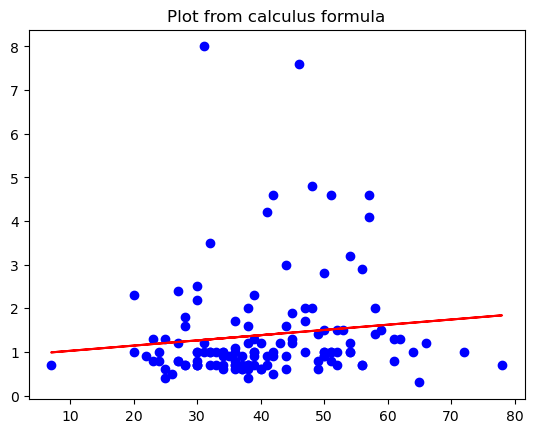

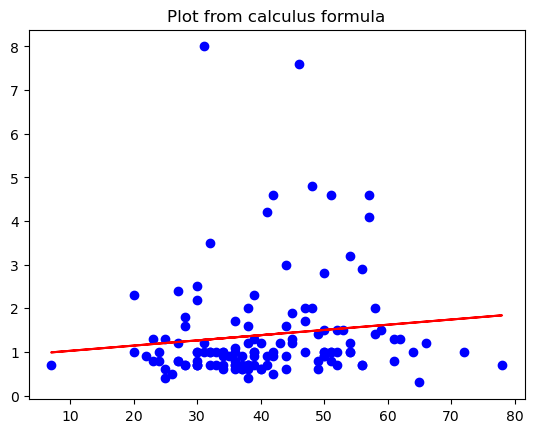

In [258]:
fig1 = plt.figure()
plt.scatter(x, y, color='blue')
plt.plot(x, [b0 + b1 * x_val for x_val in list(x.reshape(-1,))], color='red')
plt.title("Plot from calculus formula")

fig2 = plt.figure()
plt.scatter(x, y, color='blue')
plt.plot(x, [b0 + b1 * x_val for x_val in list(x.reshape(-1,))], color='red')
plt.title("Plot from calculus formula")

plt.show()

In [259]:
y_pred_calculus_formula = np.array([b0 + b1 * x_val for x_val in list(x.reshape(-1,))])

y_pred_intuitive_formula = np.array([B0 + B1 * x_val for x_val in list(x.reshape(-1,))])

print(f"\nRMSE for calculus method: {rmse(x, y_pred_calculus_formula)}")

print(f"\nRMSE for intuitive method: {rmse(x, y_pred_intuitive_formula)}")


RMSE for calculus method: 41.139716194032665

RMSE for intuitive method: 41.139716194032665


------------------------
### Question 2
------------------------

In [170]:
score_df = pd.read_csv('lab_scores.csv')
score_df.head(5)

,study_hours,score
0,0.3,2
1,0.5,4
2,2.0,7
3,1.5,5
4,3.0,10


In [171]:
score_x = score_df.study_hours.values
score_y = score_df.score.values

score_x_train, score_x_test, score_y_train, score_y_test = train_test_split(score_x, score_y, test_size=.3)

In [172]:
score_x_train.shape, score_y_train.shape

((8,), (8,))

In [173]:
score_x_train = score_x_train.reshape(-1, 1)
score_y_train = score_y_train.reshape(-1, 1)

score_x_test = score_x_test.reshape(-1, 1)
score_y_test = score_y_test.reshape(-1, 1)

In [174]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model = LinearRegression().fit(score_x_train, score_y_train)

model.score(score_x_test, score_y_test)

-0.3321385941362873

In [194]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient: [[2.97749111]]
Intercept: [1.12399631]


In [176]:
score_y_pred = model.predict(score_x_test)

print("Original:\n", score_y_test)

print("\nPrediction:\n", score_y_pred)

print("\nRMSE: ", (((score_y_pred - score_y_test)**2).sum())**.5)

Original:
 [[7]
 [7]
 [4]
 [6]]

Prediction:
 [[7.07897854]
 [8.5677241 ]
 [2.61274187]
 [4.10148743]]

RMSE:  2.8271596284641807


In [200]:
def rmse(a, b):
    a = a.reshape(-1,)
    b = b.reshape(-1,)
    return ((a - b) ** 2).mean() ** .5

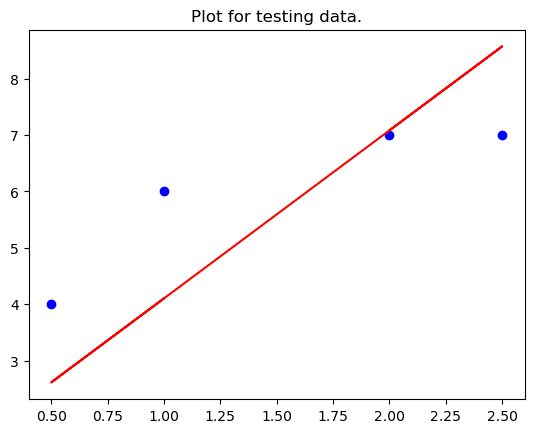

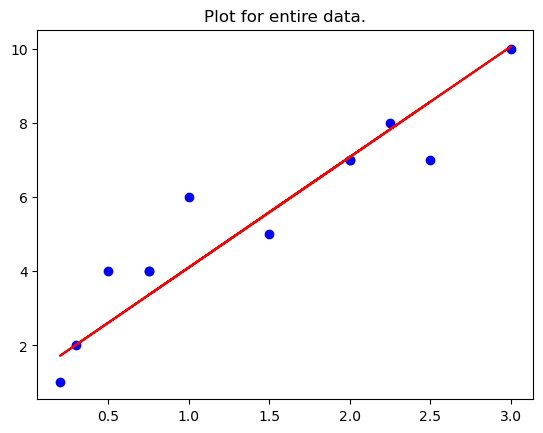

In [192]:
fig1 = plt.figure()
plt.scatter(score_x_test, score_y_test, color='blue')
plt.plot(score_x_test, score_y_pred, color='red')
plt.title("Plot for testing data")
fig2 = plt.figure()
plt.scatter(score_x, score_y, color='blue')
plt.plot(score_x, model.predict(score_x.reshape(-1,1)).reshape(-1,), color='red')
plt.title("Plot for entire data")
plt.show()

In [218]:
b1 = ( score_x.mean() * score_y.mean() - (score_x * score_y).mean() ) / ( score_x.mean() ** 2 - (score_x ** 2).mean() )

b0 = score_y.mean() - score_x.mean() * b1

print("Calculus Method:\n")
print(f"B1: {b1}, B0: {b0}")

Calculus Method:

B1: 2.588012645433235, B0: 1.8042323490827767


In [219]:
B1 = ( (score_x - score_x.mean()) * (score_y - score_y.mean()) ).sum() / ( (score_x - score_x.mean()) ** 2 ).sum()

B0 = score_y.mean() - score_x.mean() * B1

print("Intuitive Method:\n")
print(f"B1: {B1}, B0: {B0}")

Intuitive Method:

B1: 2.5880126454332353, B0: 1.8042323490827763


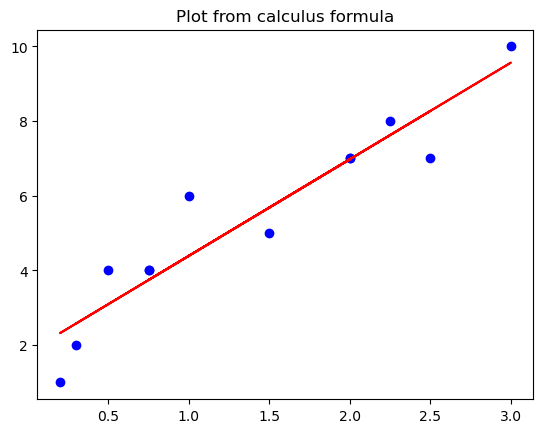

In [193]:
fig1 = plt.figure()
plt.scatter(score_x, score_y, color='blue')
plt.plot(score_x, [b0 + b1 * x_val for x_val in list(score_x.reshape(-1,))], color='red')
plt.title("Plot from calculus formula")
plt.show()

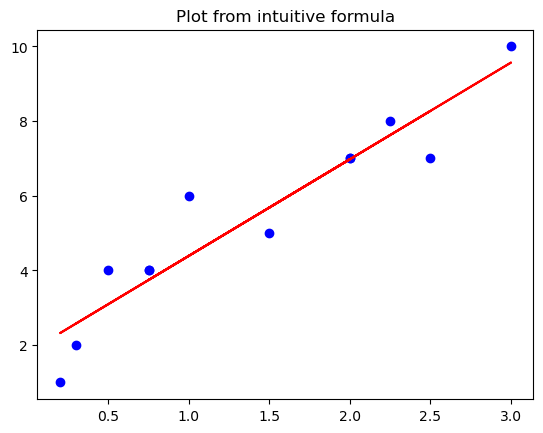

In [220]:
fig1 = plt.figure()
plt.scatter(score_x, score_y, color='blue')
plt.plot(score_x, [B0 + B1 * x_val for x_val in list(score_x.reshape(-1,))], color='red')
plt.title("Plot from intuitive formula")
plt.show()

In [221]:
print(f"From sklearn \nIntercept: {model.intercept_[0]}, Slope: {model.coef_[0, 0]}")

print(f"\n\nFrom calaculus \nIntercept: {b0}, Slope: {b1}")

print(f"\n\nFrom calaculus \nIntercept: {B0}, Slope: {B1}")

From sklearn 
Intercept: 1.1239963143346055, Slope: 2.9774911149137817


From calaculus 
Intercept: 1.8042323490827767, Slope: 2.588012645433235


From calaculus 
Intercept: 1.8042323490827763, Slope: 2.5880126454332353


In [222]:
y_pred_sklearn = model.predict(score_x.reshape(-1,1))

y_pred_calculus_formula = np.array([b0 + b1 * x_val for x_val in list(score_x.reshape(-1,))])

y_pred_intuitive_formula = np.array([B0 + B1 * x_val for x_val in list(score_x.reshape(-1,))])

print(f"RMSE for sklearn model: {rmse(score_x, y_pred_sklearn)}")

print(f"\nRMSE for calculus method: {rmse(score_x, y_pred_calculus_formula)}")

print(f"\nRMSE for intuitive method: {rmse(score_x, y_pred_intuitive_formula)}")

RMSE for sklearn model: 4.271320270826454

RMSE for calculus method: 4.266482421460223

RMSE for intuitive method: 4.266482421460224


In [223]:
print(f"Score for student studying 4 hours from sklearn: {model.predict(np.array([[4]])).reshape(-1,)[0]}")

print(f"\nScore for student studying 4 hours from calculus formula: {b0 + b1 * 4}")

print(f"\nScore for student studying 4 hours from intuitive formula: {B0 + B1 * 4}")

Score for student studying 4 hours from sklearn: 13.033960773989733

Score for student studying 4 hours from calculus formula: 12.156282930815717

Score for student studying 4 hours from intuitive formula: 12.156282930815717
